In [16]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv("udemy.csv")
data.head(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
course_id              3678 non-null int64
course_title           3678 non-null object
url                    3678 non-null object
is_paid                3678 non-null bool
price                  3678 non-null int64
num_subscribers        3678 non-null int64
num_reviews            3678 non-null int64
num_lectures           3678 non-null int64
level                  3678 non-null object
content_duration       3678 non-null float64
published_timestamp    3678 non-null object
subject                3678 non-null object
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.7+ KB


In [10]:
data['level'].values

array(['All Levels', 'All Levels', 'Intermediate Level', ...,
       'All Levels', 'All Levels', 'Beginner Level'], dtype=object)

we need to convert those levels(categorical values) into numerical Type 

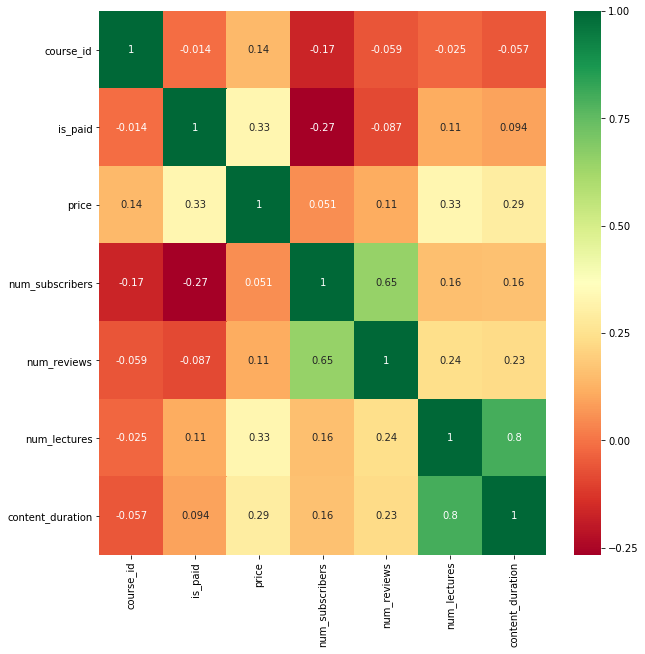

In [21]:
import seaborn as sns
corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
g

In [22]:
corrmat

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
course_id,1.000000,-0.013679,0.142319,-0.167856,-0.058550,-0.024646,-0.057223
is_paid,-0.013679,1.000000,0.328513,-0.266159,-0.087471,0.112574,0.094417
price,0.142319,0.328513,1.000000,0.050769,0.113696,0.330160,0.293450
num_subscribers,-0.167856,-0.266159,0.050769,1.000000,0.649946,0.157746,0.161839
num_reviews,-0.058550,-0.087471,0.113696,0.649946,1.000000,0.243029,0.228889
num_lectures,-0.024646,0.112574,0.330160,0.157746,0.243029,1.000000,0.801647
content_duration,-0.057223,0.094417,0.293450,0.161839,0.228889,0.801647,1.000000


In [26]:
data['level']

0               All Levels
1               All Levels
2       Intermediate Level
3               All Levels
4       Intermediate Level
5               All Levels
6           Beginner Level
7               All Levels
8             Expert Level
9               All Levels
10              All Levels
11              All Levels
12              All Levels
13              All Levels
14              All Levels
15      Intermediate Level
16          Beginner Level
17              All Levels
18              All Levels
19          Beginner Level
20              All Levels
21              All Levels
22              All Levels
23          Beginner Level
24              All Levels
25              All Levels
26              All Levels
27      Intermediate Level
28              All Levels
29          Beginner Level
               ...        
3648            All Levels
3649            All Levels
3650            All Levels
3651            All Levels
3652            All Levels
3653          Expert Level
3

In [30]:
is_paid_map={True:1,False:0}
data['is_paid']=data['is_paid'].map(is_paid_map)

In [32]:
data['is_paid'].head()

0    1
1    1
2    1
3    1
4    1
Name: is_paid, dtype: int64

In [34]:
data.corr().transpose()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
course_id,1.000000,-0.013679,0.142319,-0.167856,-0.058550,-0.024646,-0.057223
is_paid,-0.013679,1.000000,0.328513,-0.266159,-0.087471,0.112574,0.094417
price,0.142319,0.328513,1.000000,0.050769,0.113696,0.330160,0.293450
num_subscribers,-0.167856,-0.266159,0.050769,1.000000,0.649946,0.157746,0.161839
num_reviews,-0.058550,-0.087471,0.113696,0.649946,1.000000,0.243029,0.228889
num_lectures,-0.024646,0.112574,0.330160,0.157746,0.243029,1.000000,0.801647
content_duration,-0.057223,0.094417,0.293450,0.161839,0.228889,0.801647,1.000000


In [37]:
data['level'].values

array(['All Levels', 'All Levels', 'Intermediate Level', ...,
       'All Levels', 'All Levels', 'Beginner Level'], dtype=object)

In [74]:
from sklearn.preprocessing import LabelEncoder
level_types=data['level']
label=LabelEncoder()
encoded_data=label.fit_transform(level_types)

In [128]:
label.classes_

array([0, 1, 2, 3])

In [77]:
data['level']=encoded_data

In [78]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,level_type
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,0,1.5,2017-01-18T20:58:58Z,Business Finance,0
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,0,39.0,2017-03-09T16:34:20Z,Business Finance,0
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,3,2.5,2016-12-19T19:26:30Z,Business Finance,3
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,0,3.0,2017-05-30T20:07:24Z,Business Finance,0
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,3,2.0,2016-12-13T14:57:18Z,Business Finance,3


In [85]:
data['level']=encoded_data

In [87]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,level_type
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,0,1.5,2017-01-18T20:58:58Z,Business Finance,0
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,0,39.0,2017-03-09T16:34:20Z,Business Finance,0
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,3,2.5,2016-12-19T19:26:30Z,Business Finance,3
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,0,3.0,2017-05-30T20:07:24Z,Business Finance,0
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,3,2.0,2016-12-13T14:57:18Z,Business Finance,3


In [88]:
data1=data.copy()

In [90]:
data1.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,level_type
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,1,200,2147,23,51,0,1.5,2017-01-18T20:58:58Z,Business Finance,0
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,1,75,2792,923,274,0,39.0,2017-03-09T16:34:20Z,Business Finance,0
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,1,45,2174,74,51,3,2.5,2016-12-19T19:26:30Z,Business Finance,3
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,1,95,2451,11,36,0,3.0,2017-05-30T20:07:24Z,Business Finance,0
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,1,200,1276,45,26,3,2.0,2016-12-13T14:57:18Z,Business Finance,3


In [22]:
corrmat

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
course_id,1.000000,-0.013679,0.142319,-0.167856,-0.058550,-0.024646,-0.057223
is_paid,-0.013679,1.000000,0.328513,-0.266159,-0.087471,0.112574,0.094417
price,0.142319,0.328513,1.000000,0.050769,0.113696,0.330160,0.293450
num_subscribers,-0.167856,-0.266159,0.050769,1.000000,0.649946,0.157746,0.161839
num_reviews,-0.058550,-0.087471,0.113696,0.649946,1.000000,0.243029,0.228889
num_lectures,-0.024646,0.112574,0.330160,0.157746,0.243029,1.000000,0.801647
content_duration,-0.057223,0.094417,0.293450,0.161839,0.228889,0.801647,1.000000


In [48]:
min = data['published_timestamp'].min()[:4]
max = data['published_timestamp'].max()[:4]

timestamp=[ int(i[:4]) for i in data['published_timestamp']]

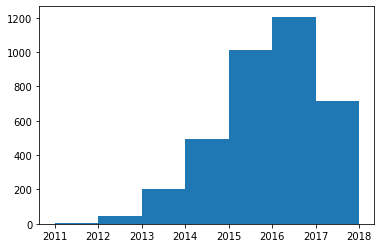

In [49]:
plt.hist(timestamp, bins=[2011,2012,2013,2014,2015,2016,2017,2018])
plt.show()

C:\Users\91949\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


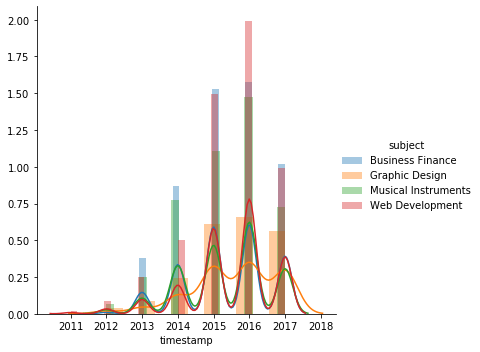

In [50]:
df = pd.DataFrame(list(zip(timestamp, data['subject'][:])), columns =['timestamp', 'subject']) 
sns.FacetGrid(df, hue="subject", size=5).map(sns.distplot, "timestamp").add_legend();
plt.show()

In [131]:
from sklearn.preprocessing import OneHotEncoder
subject_types=data['subject']
label1=OneHotEncoder()
encoded_data1=label.fit_transform(subject_types)

In [109]:
data1['subject']=encoded_data1

In [116]:
temp=data.drop(['url','level_type'],axis=1)

In [118]:
temp.tail()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,1,100,1040,14,21,0,2.0,2016-06-14T17:36:46Z,3
3674,1088178,How To Design A WordPress Website With No Codi...,1,25,306,3,42,1,3.5,2017-03-10T22:24:30Z,3
3675,635248,Learn and Build using Polymer,1,40,513,169,48,0,3.5,2015-12-30T16:41:42Z,3
3676,905096,CSS Animations: Create Amazing Effects on Your...,1,50,300,31,38,0,3.0,2016-08-11T19:06:15Z,3
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,1,45,901,36,20,1,2.0,2014-09-28T19:51:11Z,3


In [134]:
subject_types.head()

0    0
1    0
2    0
3    0
4    0
Name: subject, dtype: int32

In [136]:
temp.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,1,200,2147,23,51,0,1.5,2017-01-18T20:58:58Z,0
1,1113822,Complete GST Course & Certification - Grow You...,1,75,2792,923,274,0,39.0,2017-03-09T16:34:20Z,0
2,1006314,Financial Modeling for Business Analysts and C...,1,45,2174,74,51,3,2.5,2016-12-19T19:26:30Z,0
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,1,95,2451,11,36,0,3.0,2017-05-30T20:07:24Z,0
4,1011058,How To Maximize Your Profits Trading Options,1,200,1276,45,26,3,2.0,2016-12-13T14:57:18Z,0
